In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

In [2]:
n_epochs = 40
batch_size_train = 64
batch_size_test = 1000

learning_rate = 0.001
momentum = 0.5

#### Apply transformations to the images of mnist
##### 0.1307 and 0.3081 are global mean and standard deviation of the MNIST dataset

In [3]:
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])

#### Load the data and apply the transforms

In [4]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train= True, download= True,
                              transform=train_transforms),
                              batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train= False, download= True,
                              transform=train_transforms),
                              batch_size=batch_size_test, shuffle=True)

#### Let's check the data

In [5]:
# Move through the data in test_loader
examples = enumerate(test_loader)
# batch_id = index of the batch, next(examples) = move to next batch
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
example_data.shape

torch.Size([1000, 1, 28, 28])

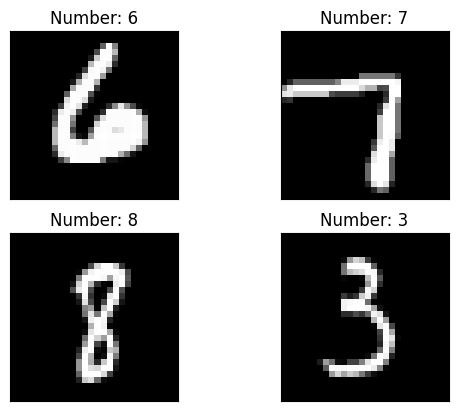

In [7]:
import matplotlib.pyplot as plt

# Let's plot first 4 images along with their actual labels
fig = plt.figure()
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Number: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

### Define the Neural Network Model

In [8]:
class Model_NN(nn.Module):
    def __init__(self):
        super(Model_NN, self).__init__()
        # inside () -> (no. of input, no. of output)
        self.layer0 = nn.Linear(28 * 28, 128)
        self.layer1 = nn.Linear(128, 64)
        self.layer2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # Flatten input image. -1 = adjust itself
        x = torch.relu(self.layer0(x))
        x = torch.relu(self.layer1(x))
        x = self.layer2(x) # as cross entropy uses softmax in it
        return x

In [9]:
model = Model_NN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#### Train the model

In [10]:
for epoch in range(n_epochs):
    model.train() # set the model on trainning mode
    running_loss = 0.0
    running_correct = 0.0
    total = 0
    for images, labels in train_loader:
        total += labels.size(0)
        
        optimizer.zero_grad()
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Check the loss during training
        running_loss += loss.item() # loss due to wrongly predicted
        running_correct += (labels==predicted).sum().item() # correct prediction

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100.00 * running_correct / total

    print(f"Epoch [{epoch + 1}/{n_epochs}]. Accuracy = {epoch_acc: .3f}%. Epoch Loss = {epoch_loss}")

Epoch [1/40]. Accuracy =  35.393%. Epoch Loss = 2.1643085205224533
Epoch [2/40]. Accuracy =  63.288%. Epoch Loss = 1.6154009831993819
Epoch [3/40]. Accuracy =  77.967%. Epoch Loss = 1.004291184103565
Epoch [4/40]. Accuracy =  83.308%. Epoch Loss = 0.6973914818595975
Epoch [5/40]. Accuracy =  85.763%. Epoch Loss = 0.555880660695562
Epoch [6/40]. Accuracy =  87.157%. Epoch Loss = 0.4803361237557458
Epoch [7/40]. Accuracy =  88.090%. Epoch Loss = 0.4342980667281507
Epoch [8/40]. Accuracy =  88.722%. Epoch Loss = 0.403313653221898
Epoch [9/40]. Accuracy =  89.240%. Epoch Loss = 0.38039769400665757
Epoch [10/40]. Accuracy =  89.595%. Epoch Loss = 0.36283289834952304
Epoch [11/40]. Accuracy =  89.990%. Epoch Loss = 0.3485446438542815
Epoch [12/40]. Accuracy =  90.292%. Epoch Loss = 0.3370822435185345
Epoch [13/40]. Accuracy =  90.568%. Epoch Loss = 0.32701015260332683
Epoch [14/40]. Accuracy =  90.835%. Epoch Loss = 0.31786894082610034
Epoch [15/40]. Accuracy =  91.022%. Epoch Loss = 0.31012

#### Evaluate the model

In [11]:
model.eval()
correct, total = 0.0, 0.0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.3f}%")        

Test Accuracy: 93.990%
